In [1]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
NETS = []
NETS.append('../nets/IP_FULL.p') # image + prob
NETS.append('../nets/IPLB_FULL.p') # image + large border
NETS.append('../nets/IPM_FULL.p') # image + prob + binary
NETS.append('../nets/IPMB_FULL.p') # image + prob + binary + border
NETS.append('../nets/IPMLB_FULL.p') # image + prob + binary + large border

network_path = NETS[2]

with open(network_path, 'rb') as f:
    net = pickle.load(f)

In [4]:
X_test, y_test = gp.Patch.load_rgb_test_only('ipm')

Loaded /home/d/patches//ipm/ in 0.000324964523315 seconds.


In [5]:
test_prediction = net.predict(X_test)
test_prediction_prob = net.predict_proba(X_test)
print
print 'Precision/Recall:'
print classification_report(y_test, test_prediction)


Precision/Recall:
             precision    recall  f1-score   support

          0       0.96      0.93      0.95      8780
          1       0.94      0.96      0.95      8780

avg / total       0.95      0.95      0.95     17560



In [6]:
test_acc = net.score(X_test, y_test)
acc_score = accuracy_score(y_test, test_prediction)
print 'Test Accuracy:', test_acc
print 'Accuracy Score:', acc_score

Test Accuracy: 0.94589977221
Accuracy Score: 0.94589977221


<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

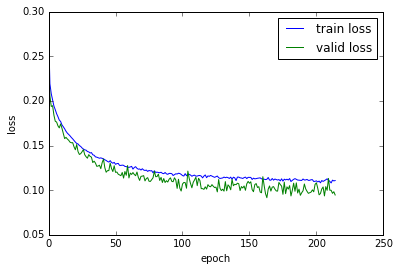

In [7]:
plot_loss(net)

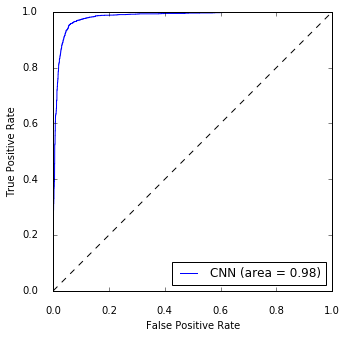

In [8]:
# ROC/AUC
fpr, tpr, _ = roc_curve(y_test, test_prediction_prob[:,1])
roc_auc = auc(fpr, tpr)
data = {}
data['CNN'] = (fpr, tpr, roc_auc)
gp.Legacy.plot_roc(data)

In [9]:
net.uuid = 'IPM'

Finding Top 5 merge errors..
4  merge errors found.
Creating dojo bigM..

Correcting merge errors with p < .05
   Mean VI improvement 0.00459787437594
   Median VI improvement 0.0
Correcting split errors with p > .95
   Mean VI improvement 0.0584495224222
   Median VI improvement 0.0321204128706

Correcting merge errors with p < .01
   Mean VI improvement 0.00459787437594
   Median VI improvement 0.0
Correcting split errors with p > .99
   Mean VI improvement 0.0280045225696
   Median VI improvement 0.0191918271091

Correcting merge errors by simulated user (er=0)
   Mean VI improvement 0.00459787437594
   Median VI improvement 0.0
Correcting split errors by simulated user (er=0)
   Mean VI improvement 0.124773965903
   Median VI improvement 0.0914241674724

   Re-running simulated user with er=0 .. 0.2


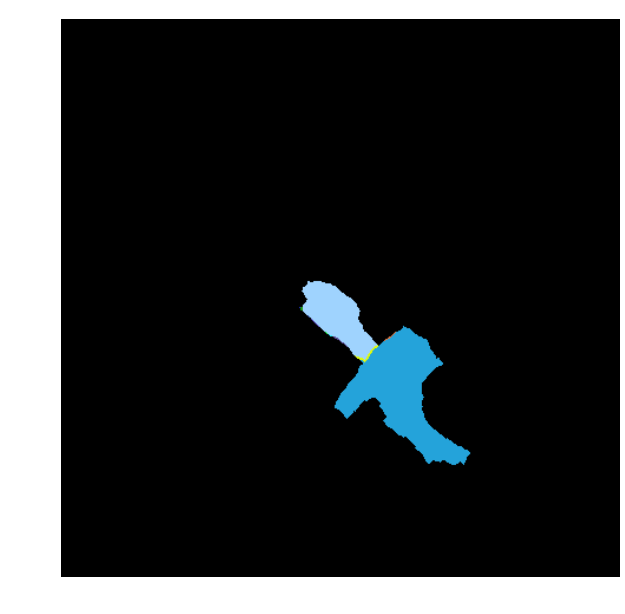

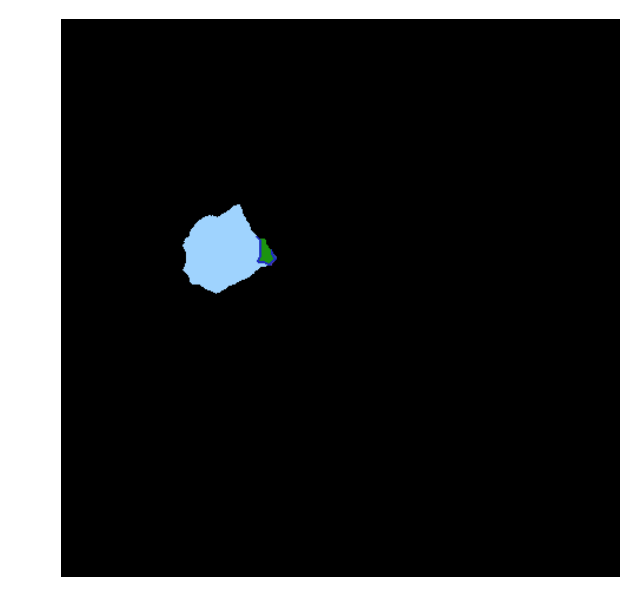

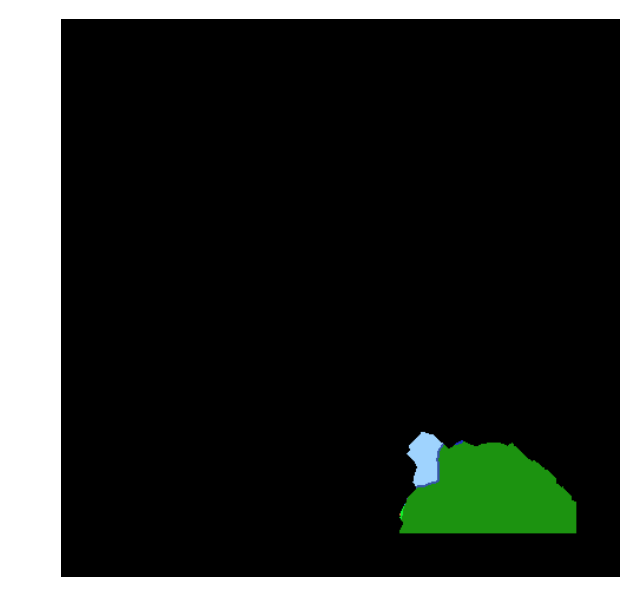

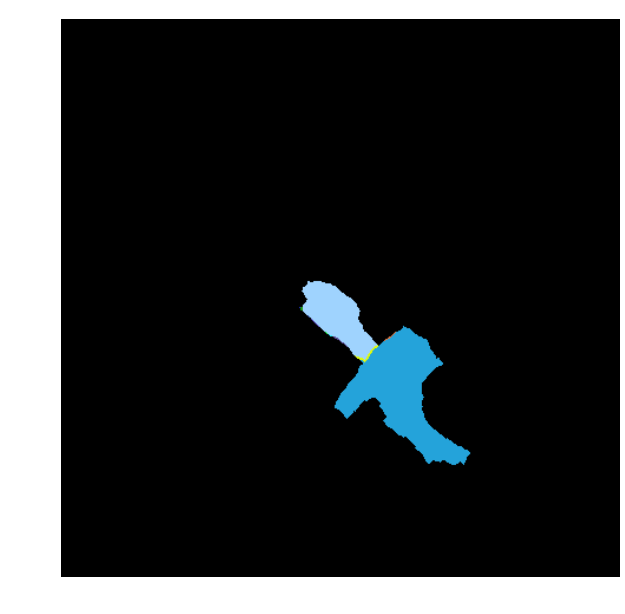

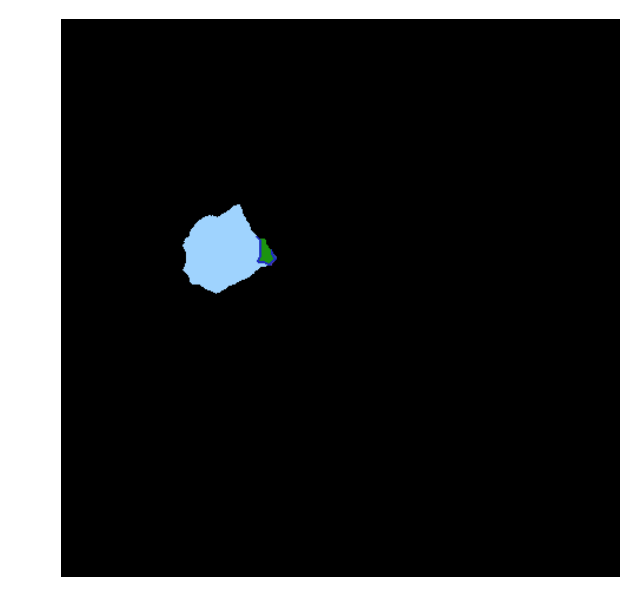

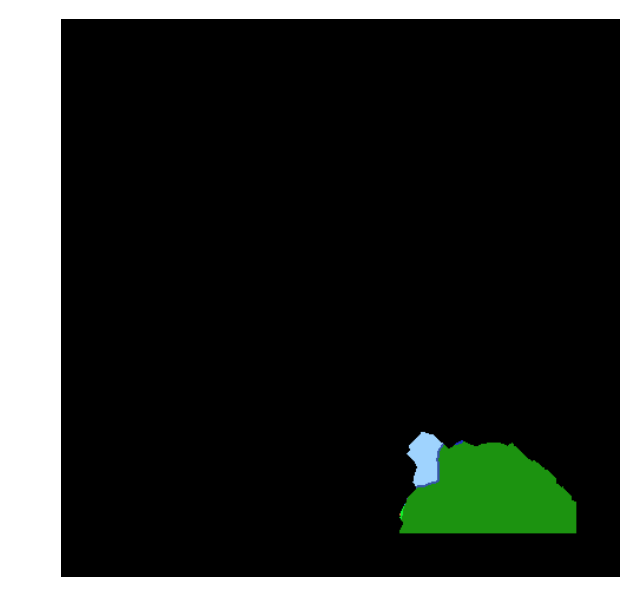

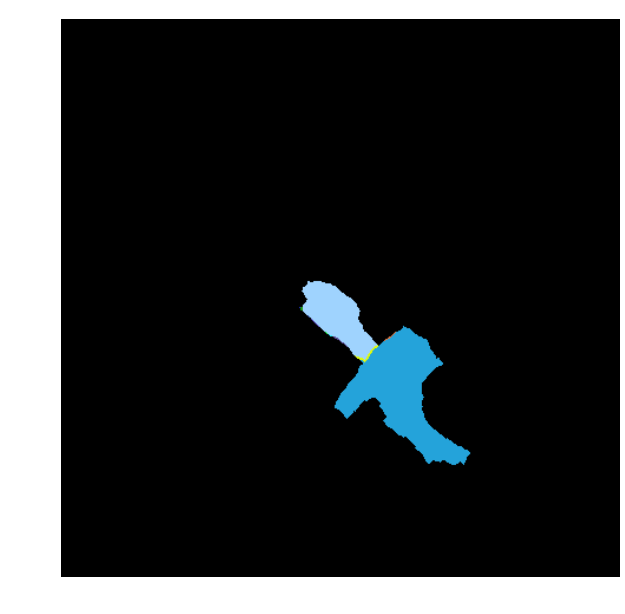

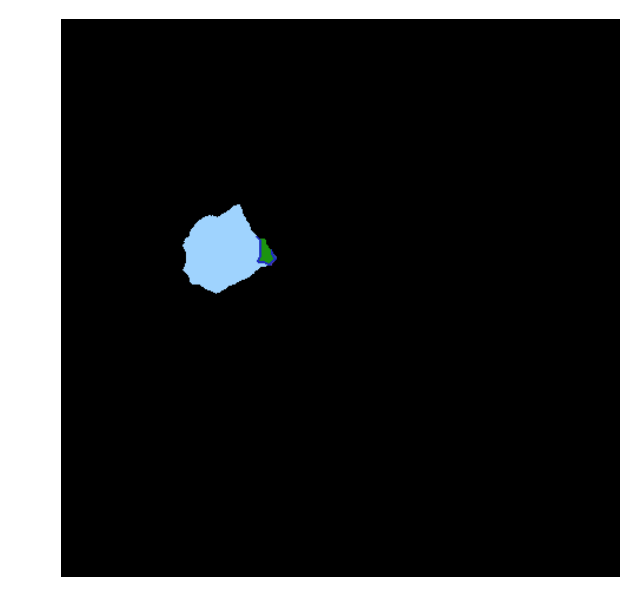

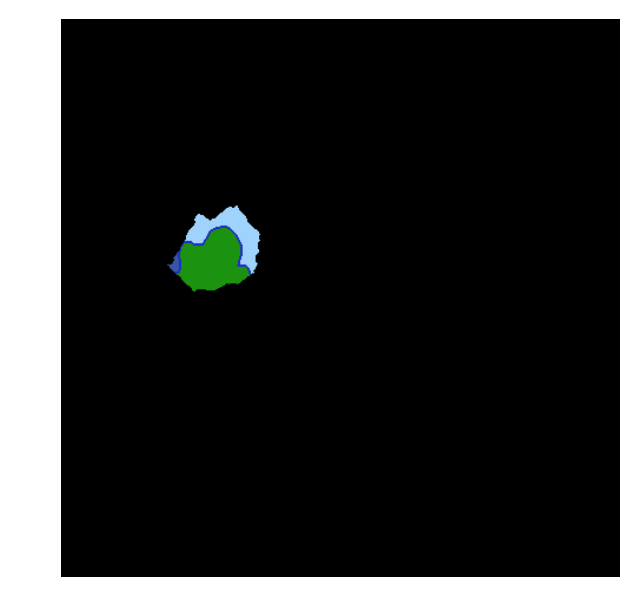

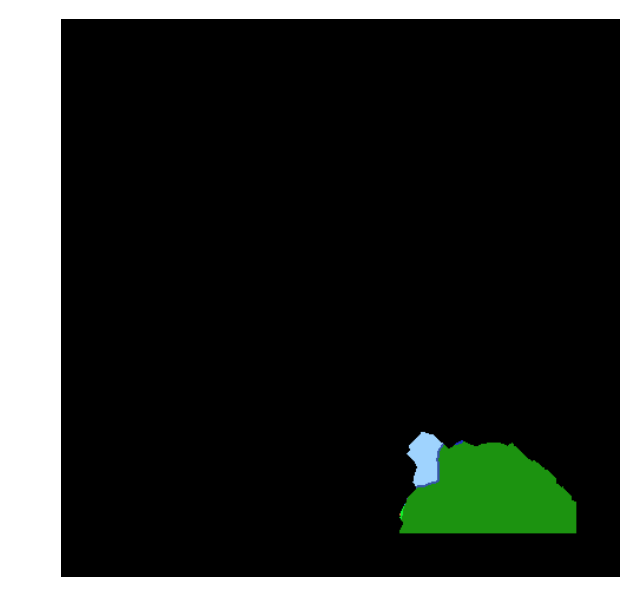

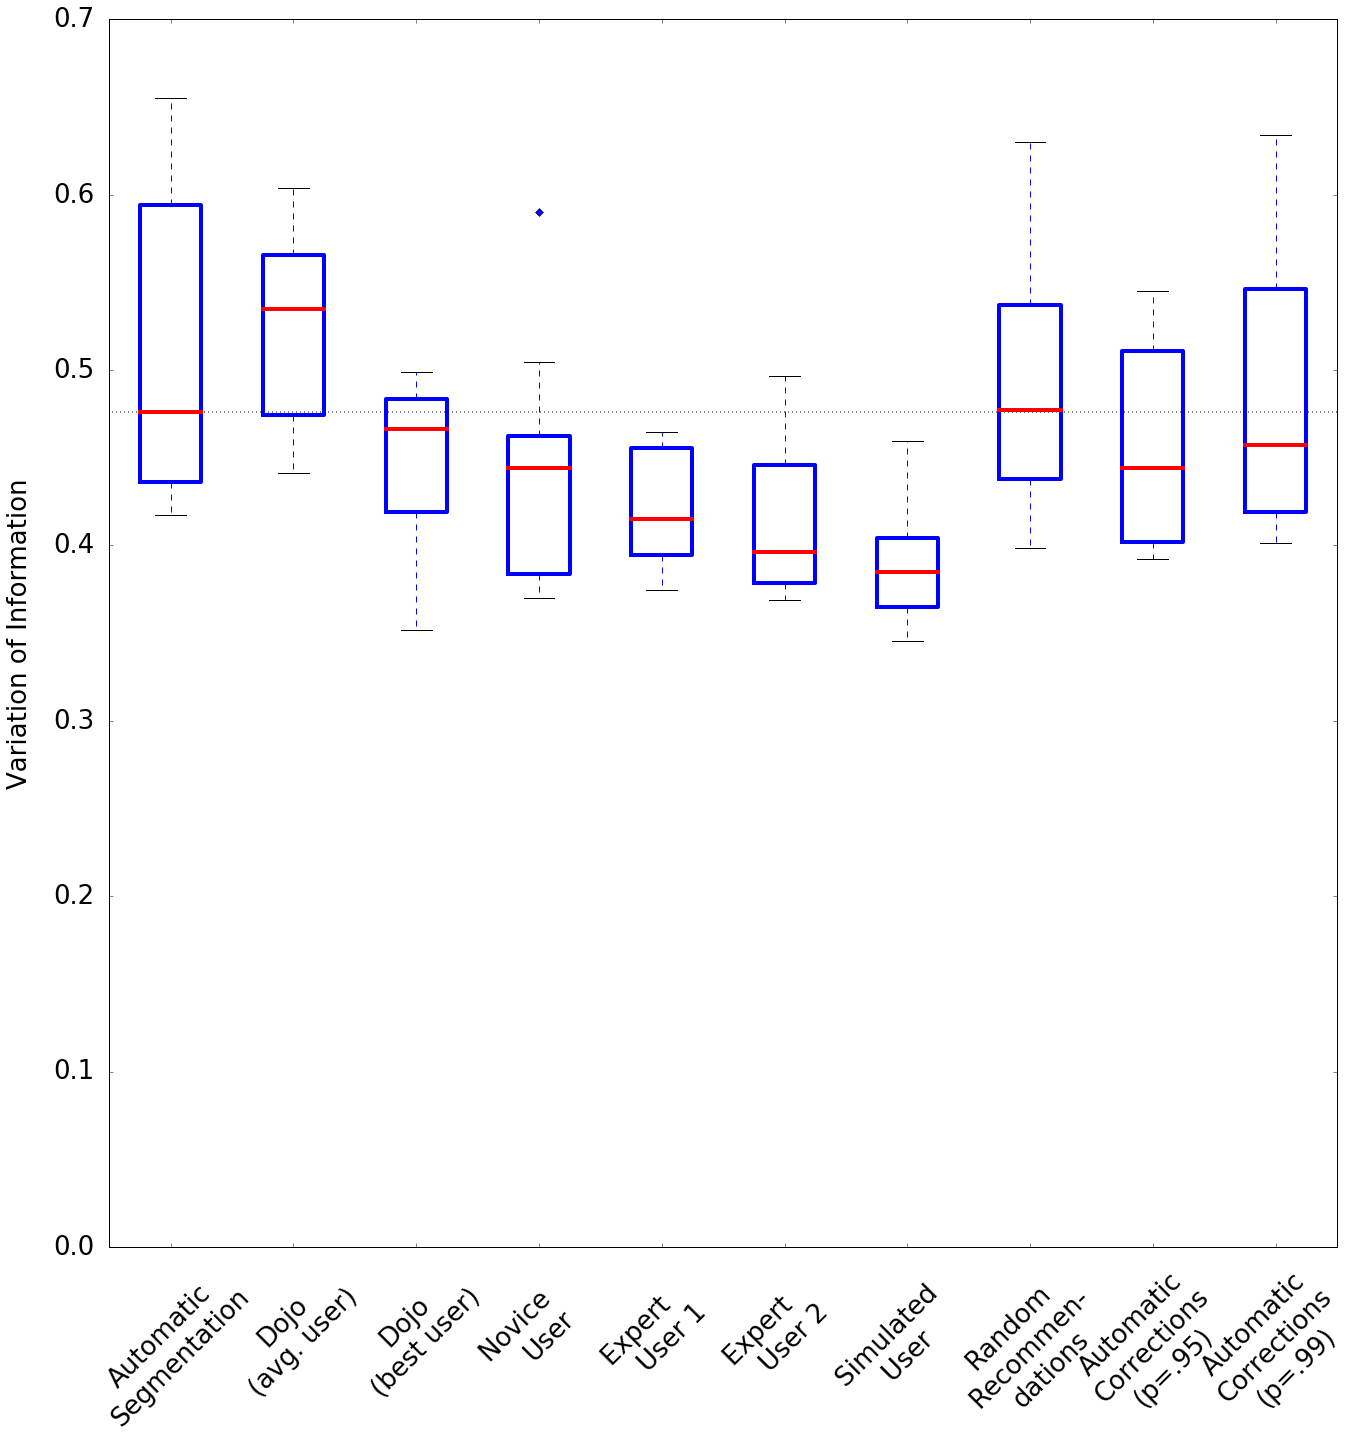

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


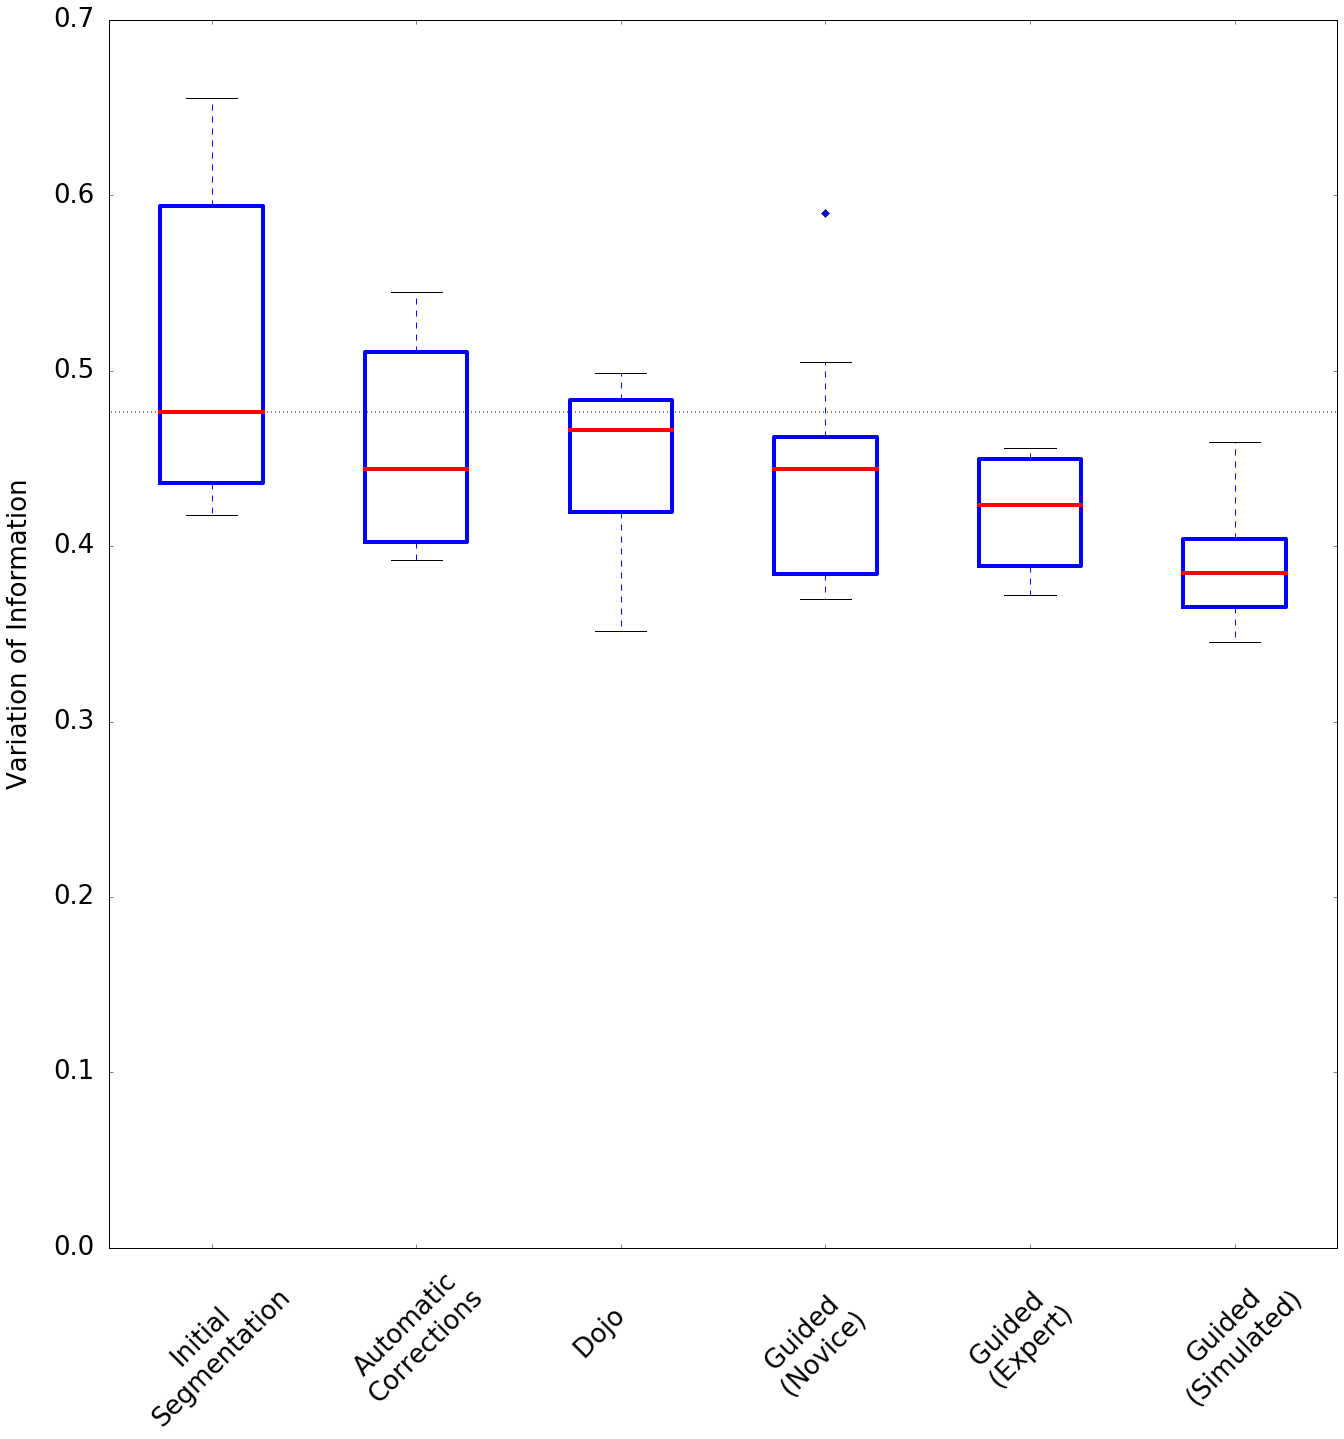

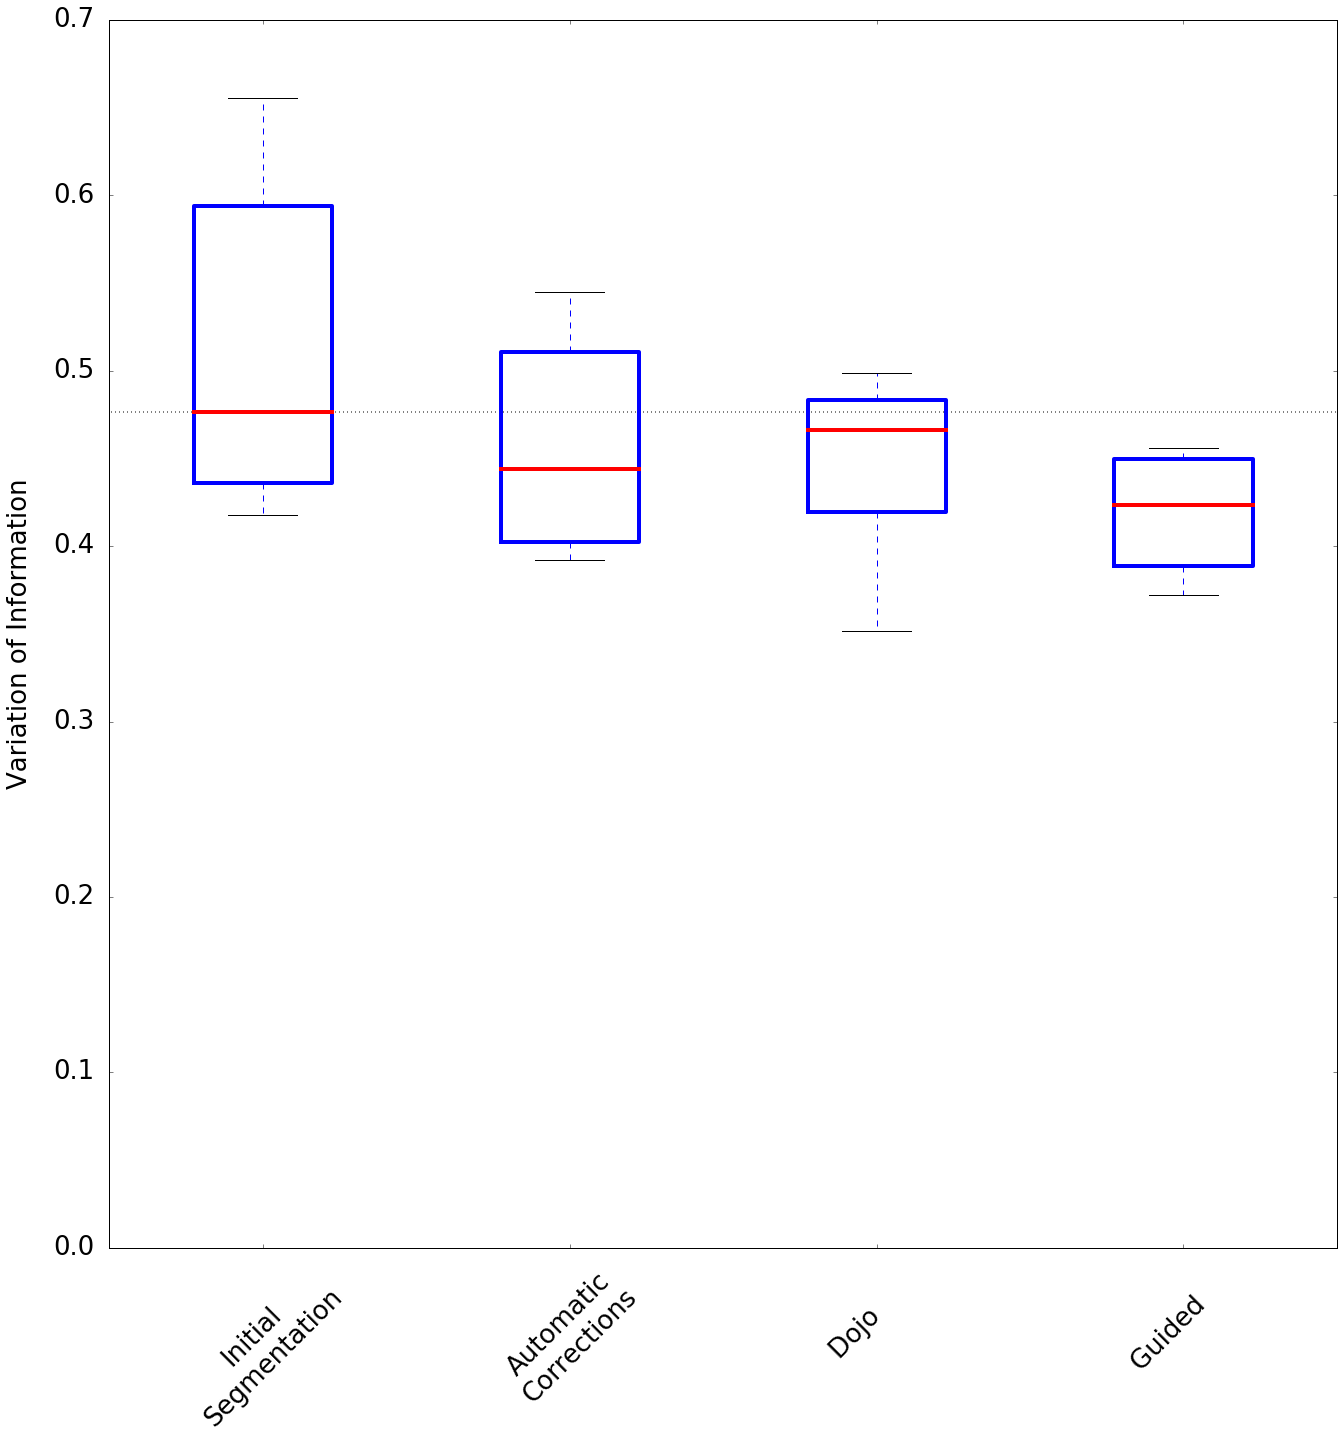

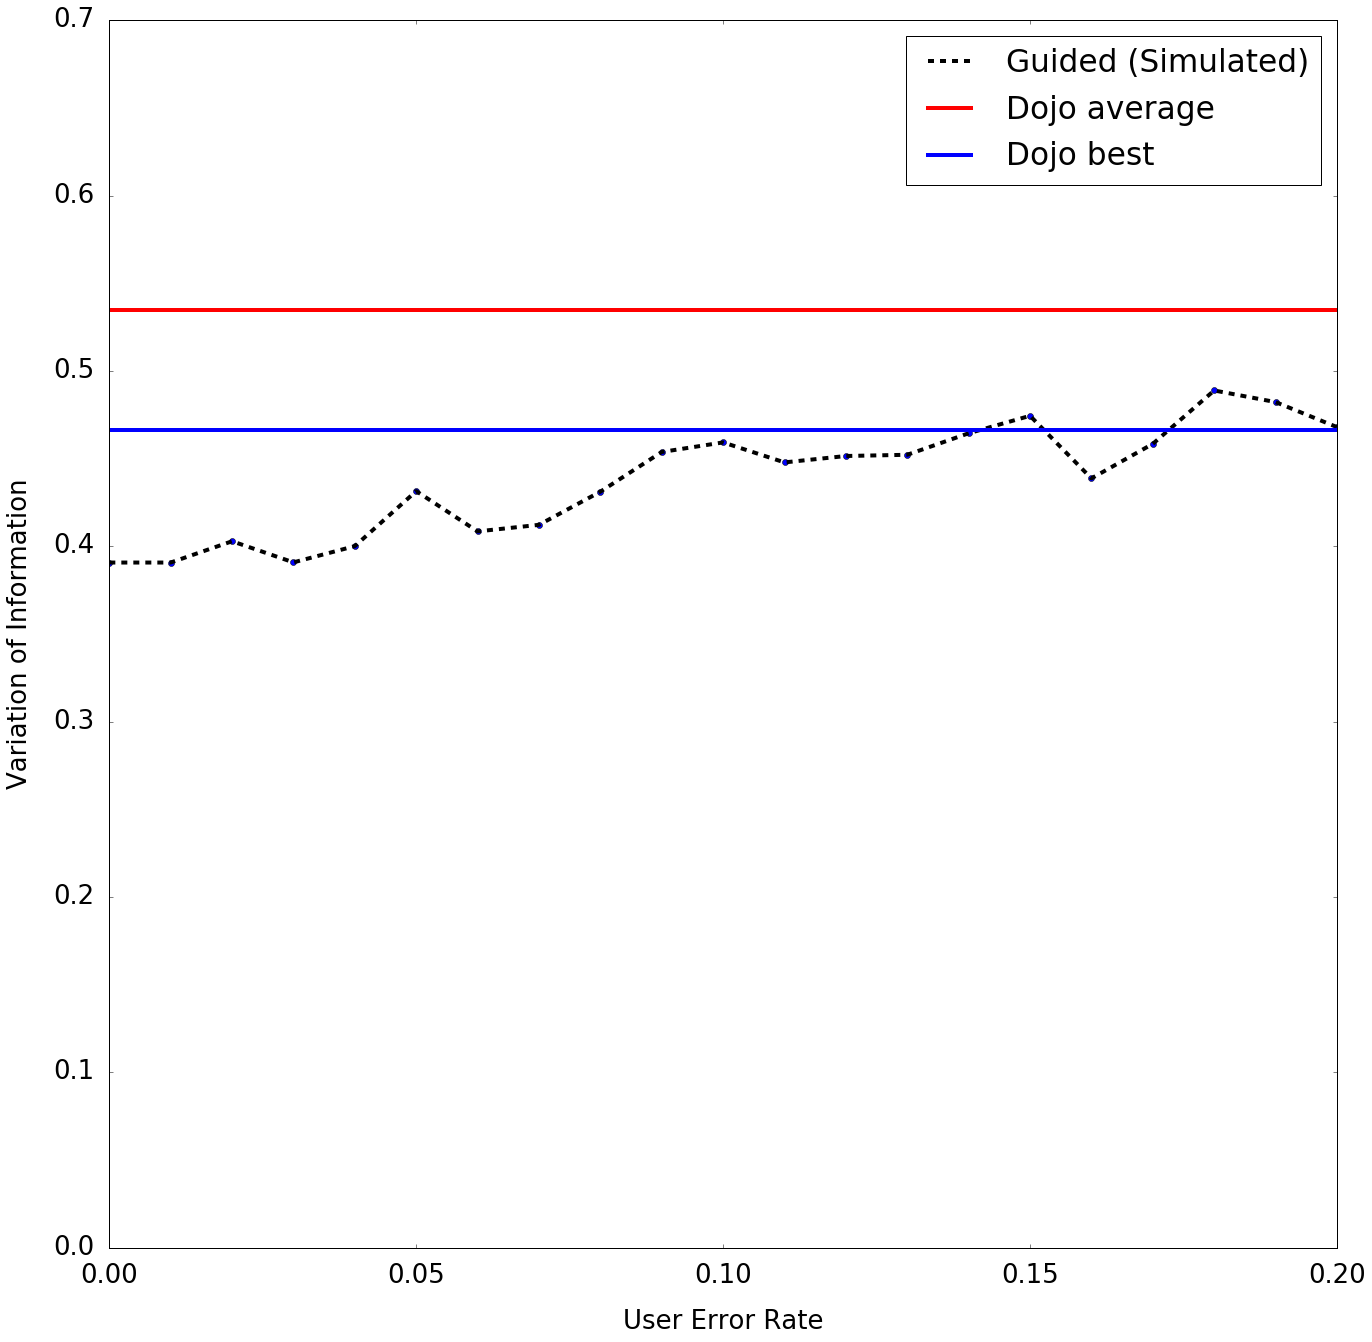

In [30]:
gp.Stats.run_dojo_xp(net)

Original median VI 0.379410649496
Creating cylinder bigM..
4772 generated in 452.891104937 seconds.
Grouped into 1159 patches in 0.0224509239197 seconds.
4568 generated in 504.386394978 seconds.
Grouped into 1115 patches in 0.0217649936676 seconds.
4624 generated in 532.711021185 seconds.
Grouped into 1123 patches in 0.0214860439301 seconds.
4276 generated in 335.807290077 seconds.
Grouped into 1054 patches in 0.0198149681091 seconds.
4220 generated in 387.971992016 seconds.
Grouped into 1040 patches in 0.0197379589081 seconds.
4348 generated in 390.036458969 seconds.
Grouped into 1061 patches in 0.0172111988068 seconds.
4372 generated in 427.490860224 seconds.
Grouped into 1065 patches in 0.019552230835 seconds.
4528 generated in 513.515380144 seconds.
Grouped into 1106 patches in 0.020968914032 seconds.
4392 generated in 546.434421062 seconds.
Grouped into 1070 patches in 0.0185980796814 seconds.
4232 generated in 522.400212049 seconds.
Grouped into 1031 patches in 0.0191111564636 se

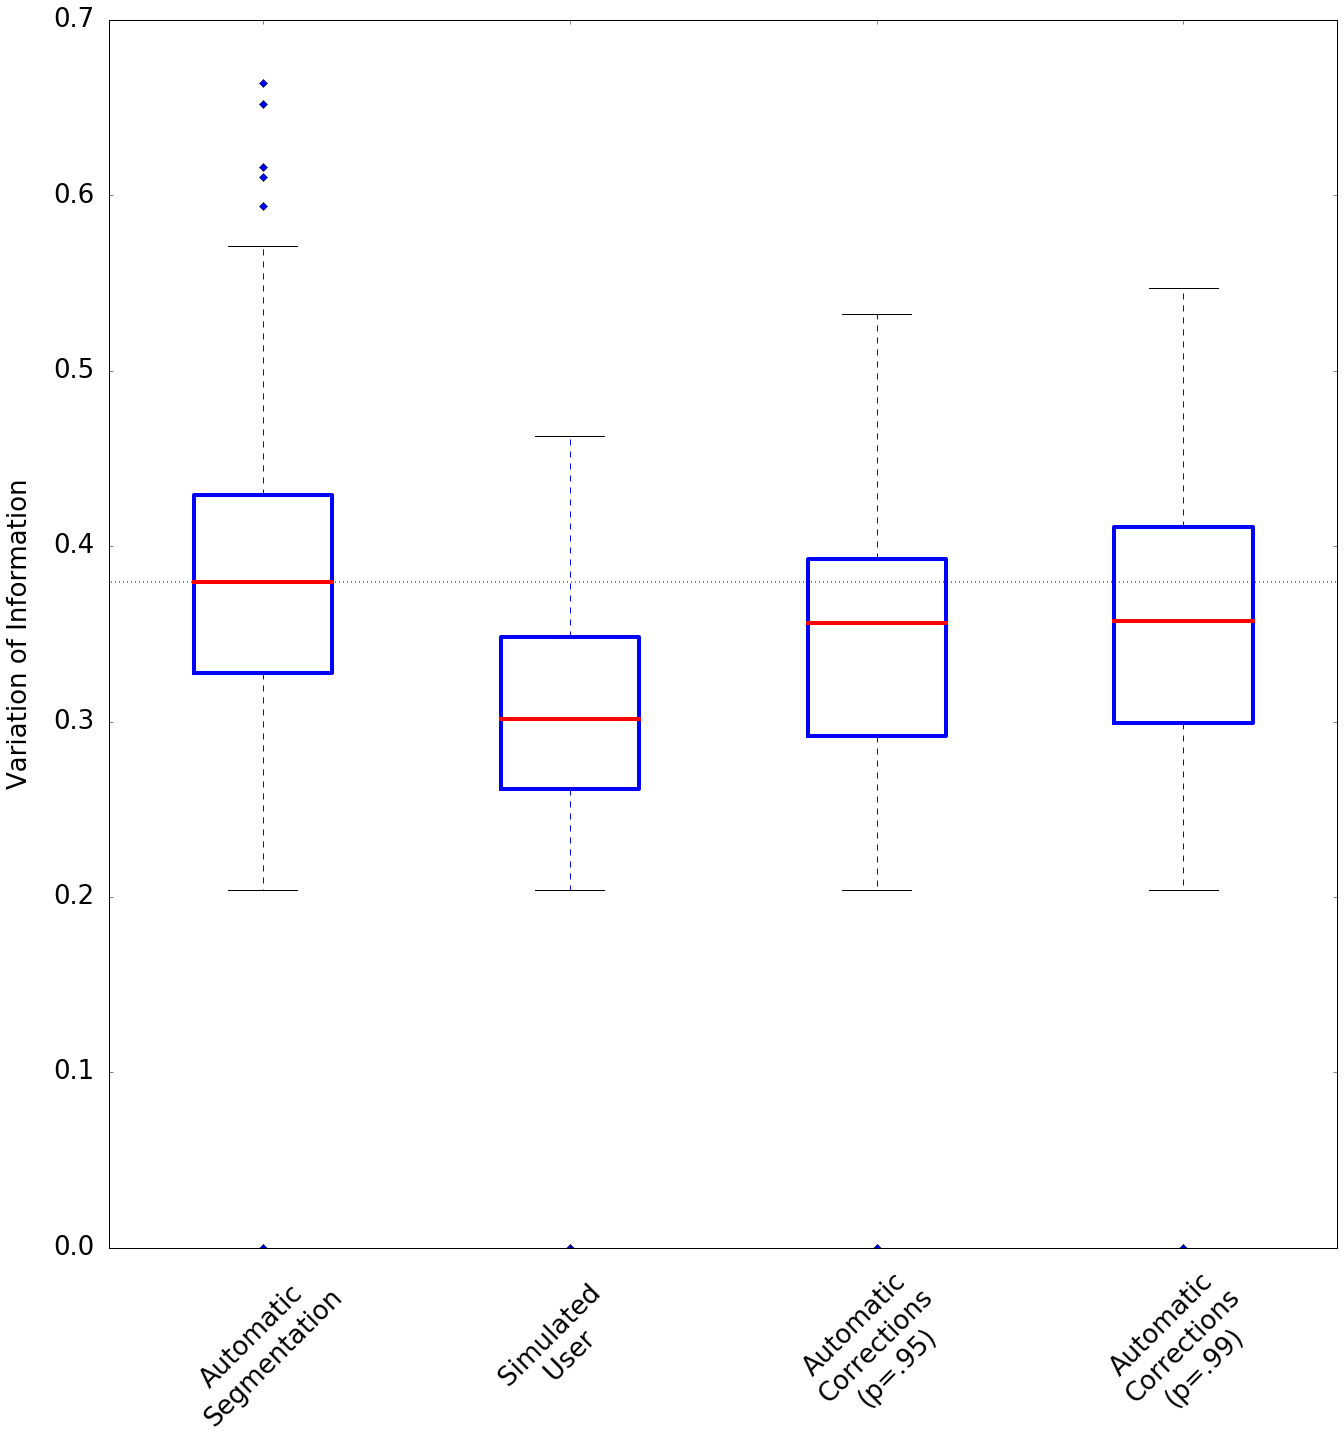

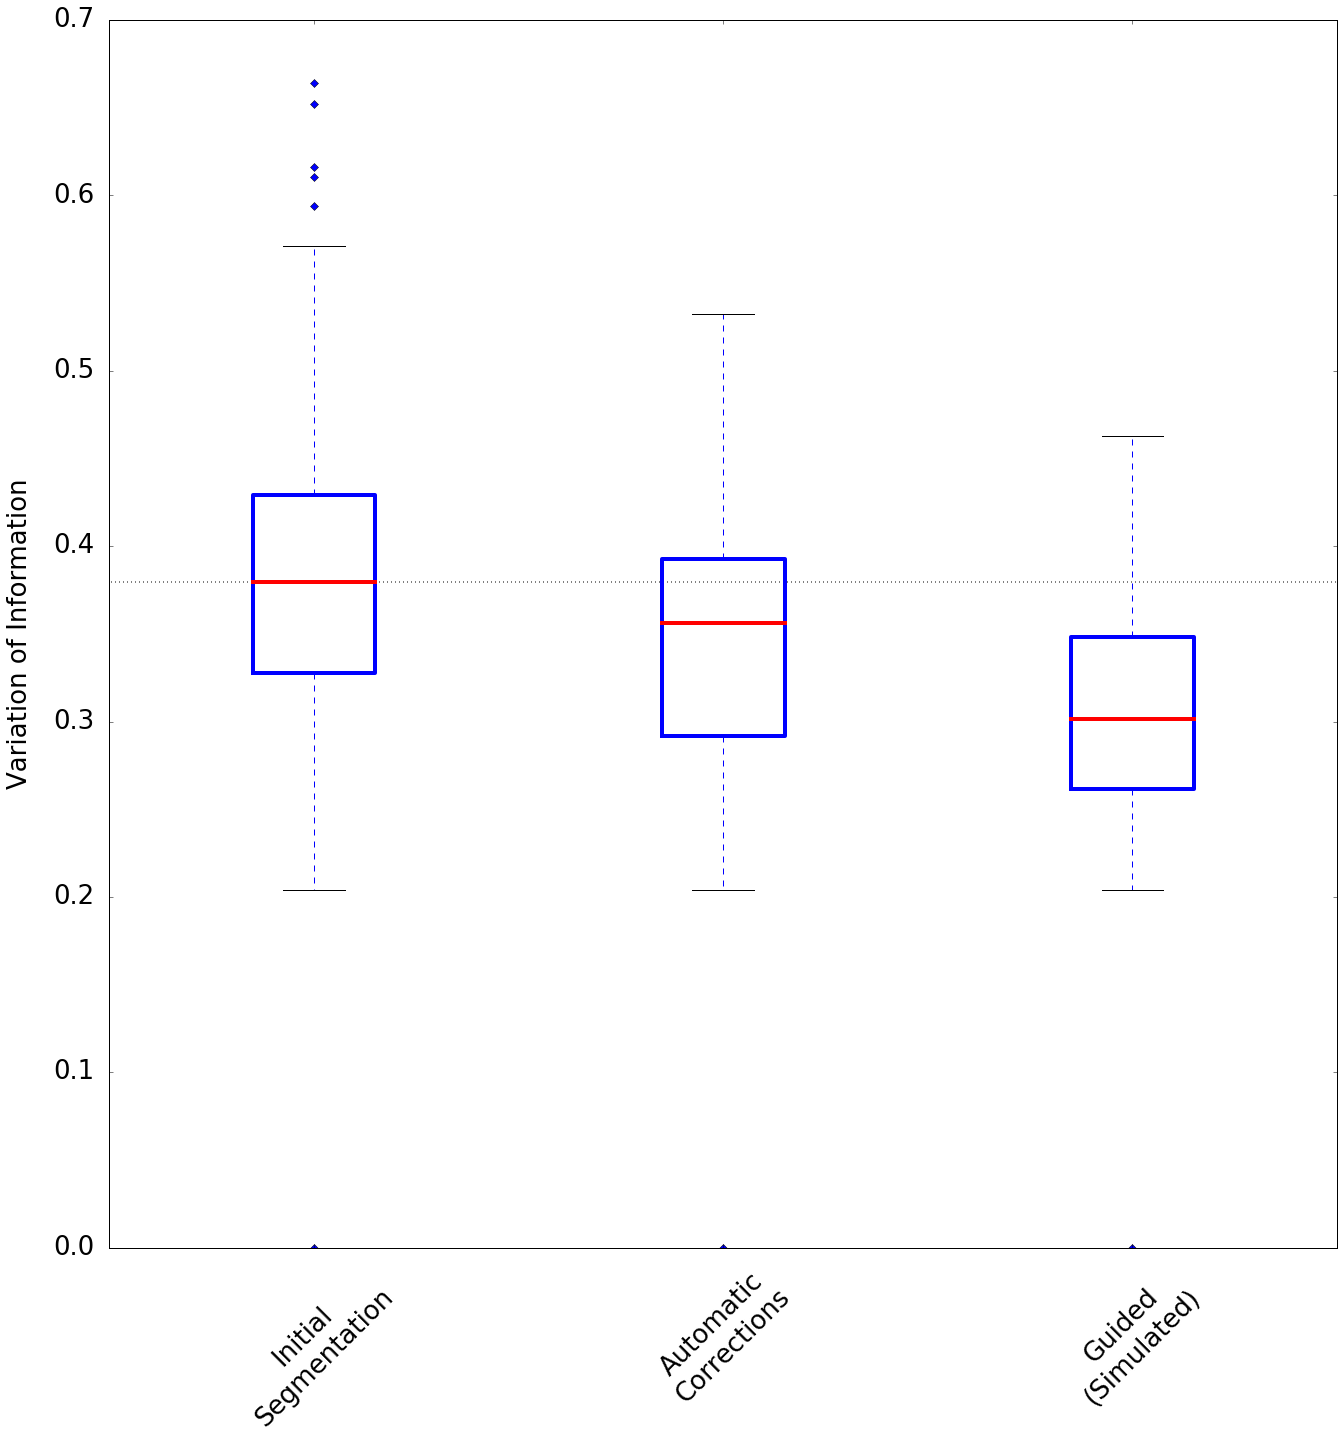

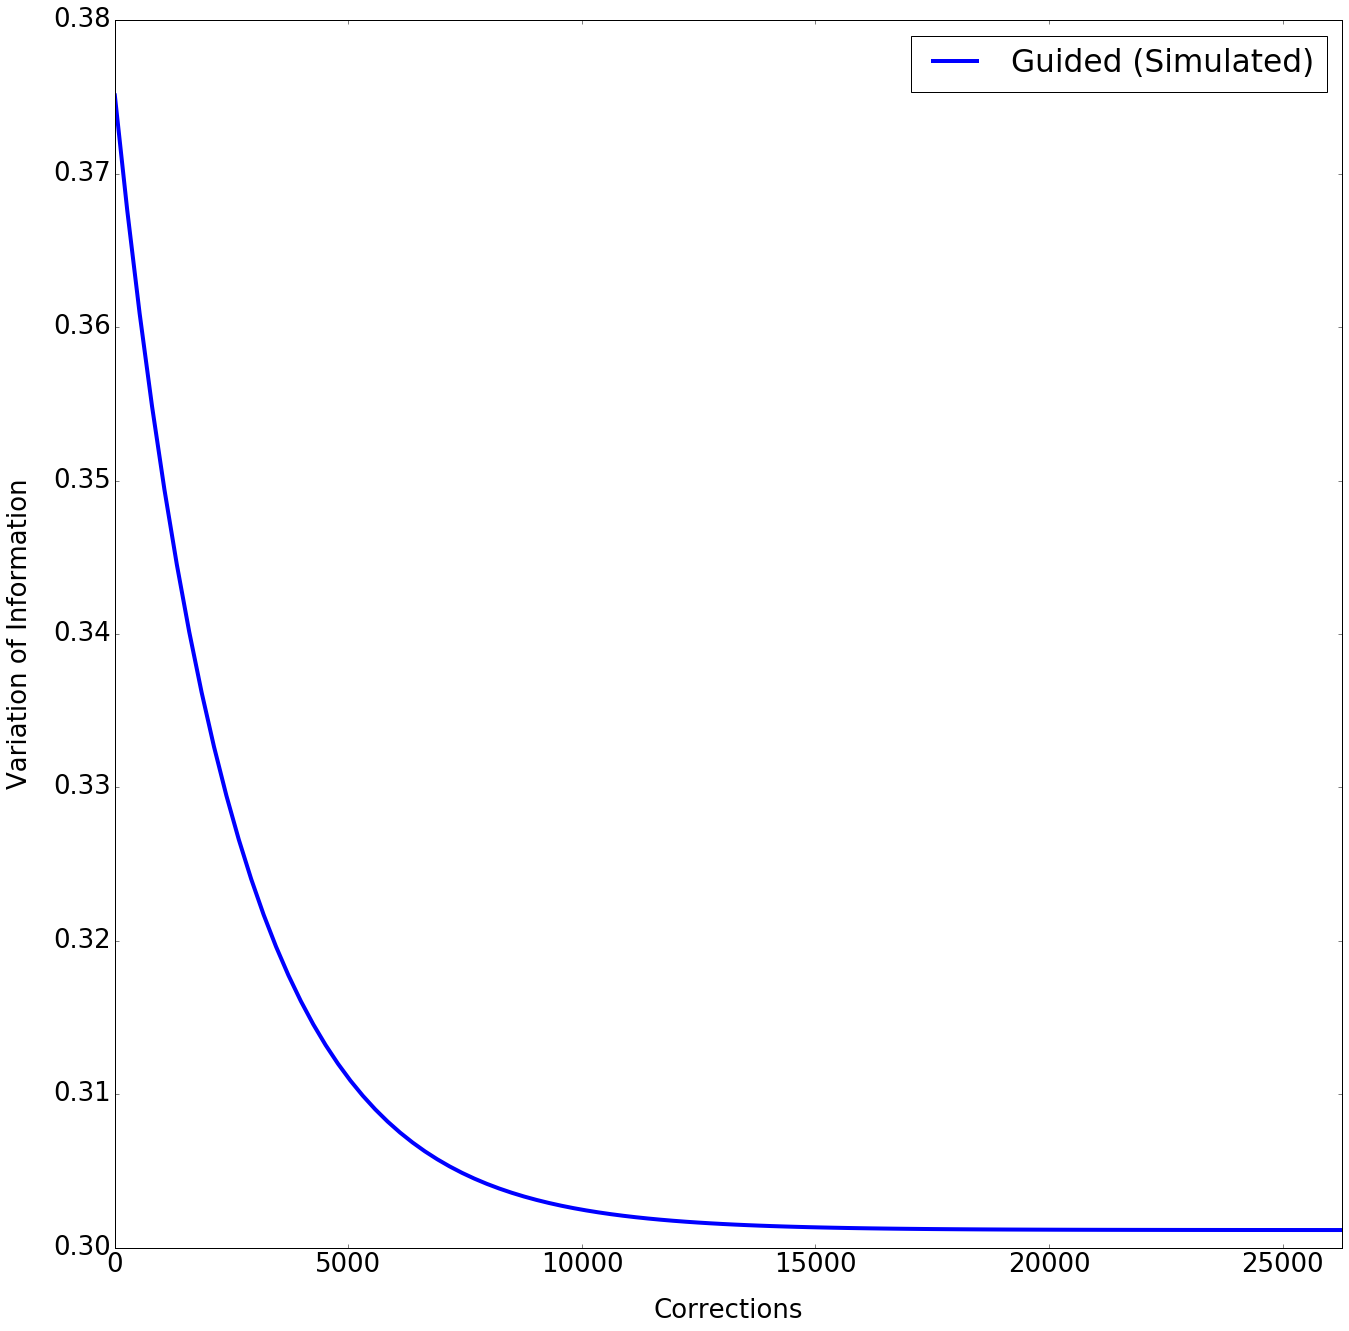

TypeError: plot_vi_combined_no_interpolation() got an unexpected keyword argument 'sweetspot'

In [31]:
gp.Stats.run_cylinder_xp(net)

In [11]:
# load dojo data
input_image, input_prob, input_gold, input_rhoana, dojo_bbox = gp.Legacy.read_dojo_data()



In [12]:
input_image[0].max()

225

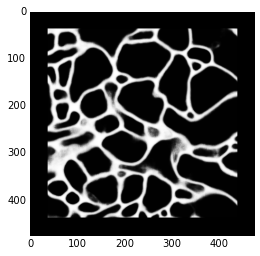

In [13]:
imshow(input_prob[2], cmap='gray')

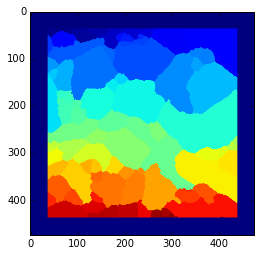

In [41]:
imshow(input_rhoana[0])

In [53]:
import numpy as np
def seg_to_color(slice):
	colors = np.zeros(slice.shape+(3,),dtype=np.uint8)
	colors[:,:,0] = np.mod(107*slice[:,:],700).astype(np.uint8)
	colors[:,:,1] = np.mod(509*slice[:,:],900).astype(np.uint8)
	colors[:,:,2] = np.mod(200*slice[:,:],777).astype(np.uint8)
	return colors

i_r = input_image[0]
rrr = np.zeros((i_r.shape[0], i_r.shape[1], 3), dtype=np.uint8)
for j in range(rrr.shape[0]):
    for i in range(rrr.shape[1]):
        rrr[j,i] = (i_r[j,i], i_r[j,i], i_r[j,i])
    
rrr[input_prob[0] > 220 ] = (0,255,0)

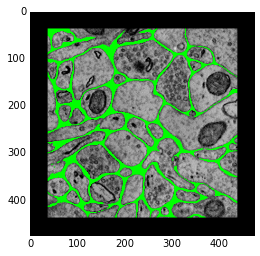

In [57]:
plt.figure()
imshow(rrr)

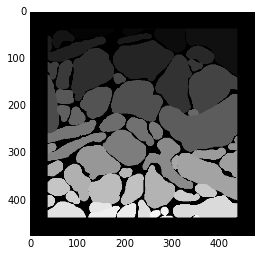

In [55]:
imshow(input_gold[0], cmap='gray')

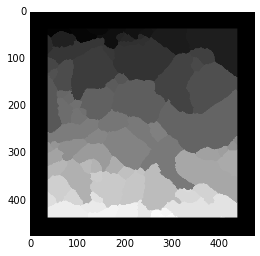

In [56]:
imshow(input_rhoana[0], cmap='gray')

In [14]:
original_mean_VI, original_median_VI, original_VI_s = gp.Legacy.VI(input_gold, input_rhoana)
original_adapted_rand = gp.metrics.adapted_rand(input_rhoana, input_gold)

KeyboardInterrupt: 

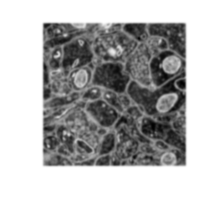

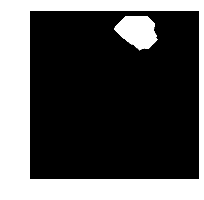

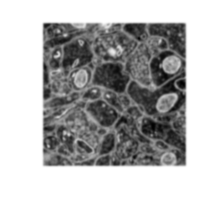

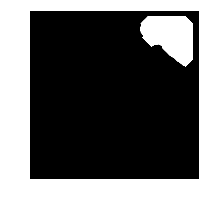

In [64]:
merge_errors = gp.Legacy.get_top5_merge_errors(net, input_image, input_prob, input_rhoana)


In [66]:
first_rand = gp.metrics.adapted_rand(input_rhoana[0], input_gold[0])

In [78]:
net.uuid = 'IPMLB'

In [15]:
M = gp.Legacy.create_bigM_without_mask(net, input_image[0:1], input_prob[0:1], input_rhoana[0:1], verbose=False)

In [25]:
newM, new_rhoana, fixes, new_vi_s = gp.Legacy.splits_global_from_M_automatic(net, M, input_image[0:1], input_prob[0:1], 
                                                                             input_rhoana[0:1], input_gold[0:1], sureness_threshold=.95)

In [26]:
fixes

[(1, 0.99975186586380005),
 (1, 0.99943643808364868),
 (1, 0.99432837963104248),
 (0, 0.98944807052612305),
 (1, 0.9682241678237915),
 (1, 0.95969843864440918),
 (1, 0.97200888395309448),
 (0, 0.95207822322845459)]

In [27]:
gp.metrics.adapted_rand(new_rhoana[0], input_gold[0])

0.069209533050430649

In [89]:
first_rand

0.073737703314086689